In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


#Metrics to evaluate models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

#Confusion matrix graphs
from sklearn.metrics import ConfusionMatrixDisplay

#Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

#Tools for PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Cluster analysis
from sklearn.cluster import KMeans

In [2]:
#Download Mnist dataset via fetch_openml from sklearn
mnist = fetch_openml('mnist_784', data_home='datasets/mnist')

In [3]:
#Check dataset
mnist.data.shape

(70000, 784)

In [4]:
#Create array with labels and features
Z = np.c_[mnist.target, mnist.data.astype(int)]
#Sorted array
Z_sorted = sorted(Z, key=lambda z: z[0])

#Checked if array had been sorted
#Z_sorted

In [5]:
#Create X and Y from data and labels
X = Z[:,1:]
Y = Z[:,0]
#Ensure shuffling of array is the same every time
shuffle_index = np.random.RandomState(seed=19).permutation(70000)
#Shuffle X and Y
X, Y = X[shuffle_index], Y[shuffle_index]
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [6]:
Y

array(['6', '7', '4', ..., '0', '0', '5'], dtype=object)

1


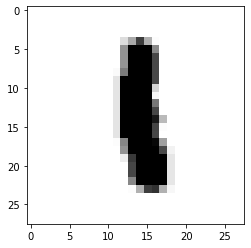

In [7]:
some_digit_index = 1997
X = X.astype(int)
print(Y[some_digit_index])
img = plt.imshow(X[some_digit_index].reshape(28, 28), cmap='gray_r')

In [8]:
#Training set
X_train = X[0:50000]
Y_train = Y[0:50000]

#Validation set
X_val = X[50000:60000]
Y_val = Y[50000:60000]

#Test set
X_test = X[60000:70000]
Y_test = Y[60000:70000]

In [9]:
#Training set has 50000 images of digits and 784 features
X_train.shape

(50000, 784)

In [10]:
#Training random forest classifier
rdf = RandomForestClassifier(n_estimators=50, n_jobs=2, random_state=19)
t0 = time.time()
rdf.fit(X_train, Y_train)
t1 = time.time()
pred_train = rdf.predict(X_train[0:10000])
t2 = time.time()


print(f'Training time: {t1-t0:3.3f}')
print(f'Prediction time for train: {t2-t1:3.3f}')
print(f'Youdens index for train: {((metrics.balanced_accuracy_score(Y_train[0:10000], pred_train)*2)-1):.3f}')

Training time: 8.975
Prediction time for train: 0.133
Youdens index for train: 1.000


In [11]:
t3 = time.time()
pred_val = rdf.predict(X_val)
t4 = time.time()
print(f'Prediction time for validation: {t4-t3:3.3f}')
print(f'Youdens index for validation: {((metrics.balanced_accuracy_score(Y_val, pred_val)*2)-1):.3f}')

Prediction time for validation: 0.154
Youdens index for validation: 0.933


In [12]:
t5 = time.time()
pred_test = rdf.predict(X_test)
t6 = time.time()
print(f'Prediction time for test: {t6-t5:3.3f}')
print(f'Youdens index for test: {((metrics.balanced_accuracy_score(Y_test, pred_test)*2)-1):.3f}')

Prediction time for test: 0.157
Youdens index for test: 0.927


In [13]:
#Random forest confusion matrix

cm = confusion_matrix(Y_test, pred_test)
cm

array([[ 967,    0,    4,    1,    0,    3,    3,    0,    4,    1],
       [   0, 1098,    5,    1,    2,    1,    2,    2,    3,    4],
       [   6,    0,  967,    3,    7,    0,    1,    6,    7,    1],
       [   0,    1,   16,  928,    0,   14,    1,   15,   12,    2],
       [   0,    1,    3,    0,  959,    0,    5,    2,    3,   14],
       [   5,    0,    0,   13,    4,  874,    8,    1,    8,    1],
       [   1,    2,    1,    0,    3,    8,  984,    0,    2,    0],
       [   1,    1,   11,    0,    5,    1,    0, 1022,    5,   12],
       [   3,    4,    2,    8,    7,    5,    5,    4,  916,   11],
       [   3,    2,    0,   14,   17,    5,    0,   13,    7,  926]])

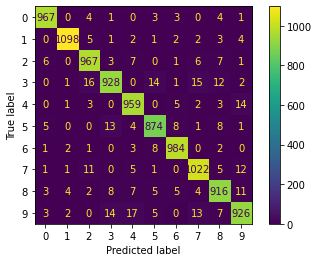

In [15]:
#Create graph of Random forest confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rdf.classes_)

disp.plot()

plt.show()

In [16]:
#Training naive bayes classifier

nb = GaussianNB()
t0 = time.time()
nb.fit(X_train, Y_train)
t1 = time.time()
pred_train = nb.predict(X_train[0:10000])
t2 = time.time()

print(f'Training time: {t1-t0:3.3f}')
print(f'Prediction time for train: {t2-t1:3.3f}')
print(f'Youdens index for train: {((metrics.balanced_accuracy_score(Y_train[0:10000], pred_train)*2)-1):.3f}')

Training time: 0.674
Prediction time for train: 0.643
Youdens index for train: 0.093


In [17]:
nb = GaussianNB(var_smoothing=0.086)
t0 = time.time()
nb.fit(X_train, Y_train)
t1 = time.time()
pred_train = nb.predict(X_train[0:10000])
t2 = time.time()

print(f'Training time: {t1-t0:3.3f}')
print(f'Prediction time for train: {t2-t1:3.3f}')
print(f'Youdens index for train: {((metrics.balanced_accuracy_score(Y_train[0:10000], pred_train)*2)-1):.3f}')

Training time: 0.735
Prediction time for train: 0.550
Youdens index for train: 0.595


In [18]:
t3 = time.time()
pred_val = nb.predict(X_val)
t4 = time.time()
print(f'Prediction time for validation: {t4-t3:3.3f}')
print(f'Youdens index for validation: {((metrics.balanced_accuracy_score(Y_val, pred_val)*2)-1):.3f}')

Prediction time for validation: 0.764
Youdens index for validation: 0.593


In [19]:
t5 = time.time()
pred_test = nb.predict(X_test)
t6 = time.time()
print(f'Prediction time for test: {t6-t5:3.3f}')
print(f'Youdens index for test: {((metrics.balanced_accuracy_score(Y_test, pred_test)*2)-1):.3f}')

Prediction time for test: 0.629
Youdens index for test: 0.603


In [20]:
#Naive bayes confusion matrix

cm = confusion_matrix(Y_test, pred_test)
cm

array([[ 874,    1,    5,    1,    0,   17,   30,    0,   45,   10],
       [   0, 1088,    3,    0,    0,    1,    7,    0,   13,    6],
       [  17,   38,  756,   19,   16,    3,   80,    4,   61,    4],
       [   8,   51,   37,  761,    3,   17,    9,   14,   44,   45],
       [   2,   16,    5,    0,  626,    1,   20,    4,   34,  279],
       [  20,   21,    7,  115,   19,  582,   32,    9,   58,   51],
       [   6,   26,    2,    0,    7,   18,  927,    0,   14,    1],
       [   6,   29,    4,    6,   16,    0,    1,  869,   15,  112],
       [   8,  100,    7,   33,   13,   17,    9,    5,  711,   62],
       [   5,   21,    1,    8,   48,    3,    1,   18,   24,  858]])

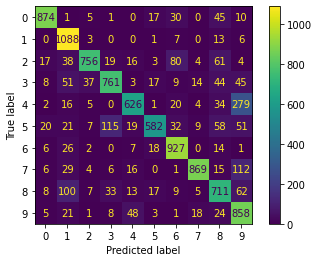

In [22]:
#Create graph of Naive bayes confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)

disp.plot()

plt.show()

In [23]:
#Training KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='brute')
t0 = time.time()
knc.fit(X_train, Y_train)
t1 = time.time()
pred_train = knc.predict(X_train[0:10000])
t2 = time.time()

print(f'Training time: {t1-t0:3.3f}')
print(f'Prediction time for train: {t2-t1:3.3f}')
print(f'Youdens index for train: {((metrics.balanced_accuracy_score(Y_train[0:10000], pred_train)*2)-1):.3f}')

Training time: 0.061
Prediction time for train: 20.572
Youdens index for train: 0.962


In [24]:
t3 = time.time()
pred_val = knc.predict(X_val)
t4 = time.time()
print(f'Prediction time for validation: {t4-t3:3.3f}')
print(f'Youdens index for validation: {((metrics.balanced_accuracy_score(Y_val, pred_val)*2)-1):.3f}')

Prediction time for validation: 23.203
Youdens index for validation: 0.942


In [25]:
t5 = time.time()
pred_test = knc.predict(X_test)
t6 = time.time()
print(f'Prediction time for test: {t6-t5:3.3f}')
print(f'Youdens index for test: {((metrics.balanced_accuracy_score(Y_test, pred_test)*2)-1):.3f}')

Prediction time for test: 16.993
Youdens index for test: 0.944


In [26]:
#KNeighborsClassifier confusion matrix

cm = confusion_matrix(Y_test, pred_test)
cm

array([[ 974,    0,    0,    0,    0,    1,    5,    1,    1,    1],
       [   0, 1112,    3,    0,    0,    0,    0,    2,    0,    1],
       [   9,    6,  966,    1,    1,    0,    0,   12,    2,    1],
       [   1,    3,    6,  958,    0,    5,    0,   10,    2,    4],
       [   0,   11,    1,    1,  953,    0,    0,    0,    0,   21],
       [   6,    0,    0,   11,    2,  883,    6,    2,    2,    2],
       [   2,    2,    0,    0,    2,    2,  993,    0,    0,    0],
       [   0,   10,    2,    0,    2,    0,    0, 1030,    2,   12],
       [   3,    9,    1,   16,    3,   12,    4,    3,  905,    9],
       [   2,    1,    0,    8,    9,    3,    0,   14,    0,  950]])

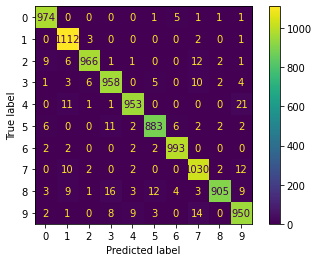

In [28]:
#Create graph of KNeighborsClassifier confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knc.classes_)

disp.plot()

plt.show()

In [29]:
#Training MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(75, 50), random_state=19)
t0 = time.time()
mlp.fit(X_train, Y_train)
t1 = time.time()
pred_train = mlp.predict(X_train[0:10000])
t2 = time.time()

print(f'Training time: {t1-t0:3.3f}')
print(f'Prediction time for train: {t2-t1:3.3f}')
print(f'Youdens index for train: {((metrics.balanced_accuracy_score(Y_train[0:10000], pred_train)*2)-1):.3f}')

Training time: 72.551
Prediction time for train: 0.082
Youdens index for train: 0.989


In [30]:
t3 = time.time()
pred_val = mlp.predict(X_val)
t4 = time.time()
print(f'Prediction time for validation: {t4-t3:3.3f}')
print(f'Youdens index for validation: {((metrics.balanced_accuracy_score(Y_val, pred_val)*2)-1):.3f}')

Prediction time for validation: 0.060
Youdens index for validation: 0.923


In [31]:
t5 = time.time()
pred_test = mlp.predict(X_test)
t6 = time.time()
print(f'Prediction time for test: {t6-t5:3.3f}')
print(f'Youdens index for test: {((metrics.balanced_accuracy_score(Y_test, pred_test)*2)-1):.3f}')

Prediction time for test: 0.084
Youdens index for test: 0.921


In [32]:
#MLPClassifier confusion matrix

cm = confusion_matrix(Y_test, pred_test)
cm

array([[ 961,    0,    4,    2,    2,    2,    5,    0,    1,    6],
       [   0, 1092,    5,    1,    0,    5,    2,    1,    8,    4],
       [   3,    2,  957,    7,    4,    1,    2,   12,    9,    1],
       [   2,    1,    9,  924,    1,   23,    1,    9,   10,    9],
       [   1,    2,    2,    1,  944,    3,    2,    3,    0,   29],
       [   5,    2,    3,    4,    1,  881,    7,    1,    6,    4],
       [   5,    1,    1,    0,    5,    5,  977,    2,    4,    1],
       [   1,    0,    5,    2,    7,    2,    0, 1020,    2,   19],
       [   1,    3,    4,    9,    2,   15,    3,    6,  904,   18],
       [   0,    0,    0,    4,   11,    9,    0,   10,    3,  950]])

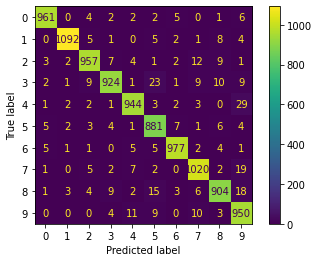

In [34]:
#Create graph of MLPClassifier confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)

disp.plot()

plt.show()

In [35]:
#Cluster analysis

t0 = time.time()
kmeans = KMeans(n_clusters=10, n_init=10, random_state=19, max_iter=300, algorithm='auto').fit(X_train, Y_train)
t1 = time.time()
pred_train = kmeans.predict(X_train[0:10000])
t2 = time.time()
pred_train = pred_train.astype(str)

print(f'Training time: {t1-t0:3.3f}')
print(f'Prediction time for train: {t2-t1:3.3f}')
print(f'Youdens index for train: {((metrics.balanced_accuracy_score(Y_train[0:10000], pred_train)*2)-1):.3f}')


Training time: 35.022
Prediction time for train: 0.196
Youdens index for train: -0.713


In [36]:
t3 = time.time()
pred_val = kmeans.predict(X_val)
t4 = time.time()

pred_val = pred_val.astype(str)

print(f'Prediction time for validation: {t4-t3:3.3f}')
print(f'Youdens index for validation: {((metrics.balanced_accuracy_score(Y_val, pred_val)*2)-1):.3f}')

Prediction time for validation: 0.059
Youdens index for validation: -0.726


In [37]:
t5 = time.time()
pred_test = kmeans.predict(X_test)
t6 = time.time()

pred_test = pred_test.astype(str)

print(f'Prediction time for test: {t6-t5:3.3f}')
print(f'Youdens index for test: {((metrics.balanced_accuracy_score(Y_test, pred_test)*2)-1):.3f}')

Prediction time for test: 0.064
Youdens index for test: -0.717


In [38]:
#Cluster analysis confusion matrix

cm = confusion_matrix(Y_test, pred_test)
cm

array([[ 48,   5, 103,   4,  12,   0, 760,  42,   5,   4],
       [  1, 492,   1,   0,   0, 617,   0,   4,   3,   0],
       [ 57,  58,  16, 707,  41,  54,  11,  40,   8,   6],
       [616,  17, 200,  39,   9,  64,   5,  10,   6,  23],
       [  0,  43,   2,   1, 375,  16,   0,  27, 249, 274],
       [296, 110, 301,   3,  28,  26,  10,  28,  64,  48],
       [  2,  30,  20,  10, 104,  41,   8, 786,   0,   0],
       [  0,  29,   1,   8,  81,  35,   0,   0, 485, 419],
       [221,  57, 534,   5,  19,  50,   7,   7,  34,  31],
       [ 16,   9,  11,   0, 204,  27,   5,   2, 299, 414]])

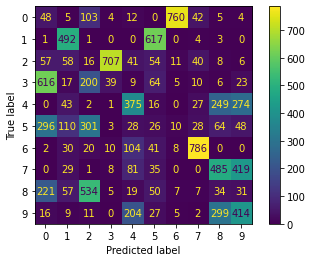

In [40]:
#Create graph of Cluster analysis confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

plt.show()

In [41]:
#Prepare data for Principal component analysis

scaler = StandardScaler()

scaler.fit(X_train)

#Standardize train, val and test set
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [42]:
X_train[30000]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.83977140e-03, -6.30410991e-03, -4.47218068e-03, -4.47218068e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -5.29758889e-03, -9.12048405e-03, -1.23219199e-02,
       -1.66672826e-02, -2.11992688e-02, -2.47321873e-02, -2.96322779e-02,
       -3.20377898e-02, -3.25333942e-02, -3.52804833e-02, -3.22301660e-02,
       -2.92673636e-02, -2.58725604e-02, -2.10494713e-02, -1.81656897e-02,
       -1.60250518e-02, -9.80577533e-03, -7.61265508e-03, -4.79881857e-03,
        0.00000000e+00,  

In [43]:
#PCA with 0.95 variance retained
pca = PCA(.95)

pca.fit(X_train)

X_train = pca.transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)

In [44]:
X_train[30000]

array([-1.17652676e+00, -2.91882918e+00, -5.86255886e+00, -6.29514941e+00,
       -1.33230702e+00,  5.06334359e+00, -4.79654365e+00,  3.34138538e+00,
       -2.07886477e+00,  2.77894626e+00, -7.10281135e+00,  4.20124064e+00,
        4.82642160e+00,  4.73933784e+00, -2.20994168e+00, -9.32995022e-01,
        3.76016208e+00, -4.08395376e+00,  4.36717868e+00,  3.35742921e+00,
        1.18356389e+00, -1.65859407e+00, -5.67231519e+00, -1.84240525e+00,
       -3.82119837e+00, -9.22646592e-01,  3.40417903e+00, -2.63054016e+00,
       -1.36811602e+00,  3.01599750e+00, -2.40828009e+00,  5.42084953e+00,
       -2.83695886e-01, -5.08245297e-01,  2.07432621e+00,  3.51503244e+00,
       -1.84580715e+00, -2.03561335e+00,  2.57752864e+00, -7.92538642e-02,
       -7.72439103e-01, -6.17169394e-01, -1.70230532e+00, -4.54784456e-01,
        1.03212890e+00, -8.50657186e-01, -1.66415179e+00, -1.67563840e+00,
       -4.79847815e-01, -9.01788934e-01,  4.53690834e-01, -2.19440493e+00,
       -1.59634311e+00,  

In [45]:
X_train.shape

(50000, 328)

In [46]:
#Training PCA applied random forest classifier
rdf = RandomForestClassifier(n_estimators=50, n_jobs=2, random_state=19)
t0 = time.time()
rdf.fit(X_train, Y_train)
t1 = time.time()
pred_train = rdf.predict(X_train[0:10000])
t2 = time.time()


print(f'Training time: {t1-t0:3.3f}')
print(f'Prediction time for train: {t2-t1:3.3f}')
print(f'Youdens index for train: {((metrics.balanced_accuracy_score(Y_train[0:10000], pred_train)*2)-1):.3f}')

Training time: 37.701
Prediction time for train: 0.172
Youdens index for train: 1.000


In [47]:
t3 = time.time()
pred_val = rdf.predict(X_val)
t4 = time.time()
print(f'Prediction time for validation: {t4-t3:3.3f}')
print(f'Youdens index for validation: {((metrics.balanced_accuracy_score(Y_val, pred_val)*2)-1):.3f}')

Prediction time for validation: 0.231
Youdens index for validation: 0.862


In [48]:
t5 = time.time()
pred_test = rdf.predict(X_test)
t6 = time.time()
print(f'Prediction time for test: {t6-t5:3.3f}')
print(f'Youdens index for test: {((metrics.balanced_accuracy_score(Y_test, pred_test)*2)-1):.3f}')

Prediction time for test: 0.272
Youdens index for test: 0.851


In [49]:
#PCA applied Random forest confusion matrix

cm = confusion_matrix(Y_test, pred_test)
cm

array([[ 955,    0,    3,    3,    2,    8,    9,    0,    3,    0],
       [   0, 1084,    8,    3,    3,    0,    9,    2,    6,    3],
       [   9,    1,  933,   17,   12,    0,    7,    4,   13,    2],
       [   3,    2,   22,  900,    3,   18,    2,   15,   18,    6],
       [   1,    2,    7,    1,  927,    2,    6,    9,    7,   25],
       [  11,    1,    9,   48,    5,  805,   16,    4,   11,    4],
       [   7,    1,    3,    2,    6,   11,  967,    0,    4,    0],
       [   5,    6,   13,    7,   11,    1,    0,  981,    1,   33],
       [   7,    4,   18,   33,    9,   26,    6,    4,  851,    7],
       [   4,    1,    4,   16,   45,    7,    0,   37,    9,  864]])

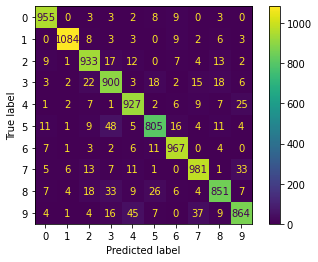

In [51]:
#Create graph of PCA applied Random forest confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rdf.classes_)

disp.plot()

plt.show()

In [52]:
#Training PCA applied naive bayes classifier

nb = GaussianNB()
t0 = time.time()
nb.fit(X_train, Y_train)
t1 = time.time()
pred_train = nb.predict(X_train[0:10000])
t2 = time.time()

print(f'Training time: {t1-t0:3.3f}')
print(f'Prediction time for train: {t2-t1:3.3f}')
print(f'Youdens index for train: {((metrics.balanced_accuracy_score(Y_train[0:10000], pred_train)*2)-1):.3f}')

Training time: 0.578
Prediction time for train: 0.486
Youdens index for train: -0.123


In [53]:
#Training PCA applied naive bayes classifier

nb = GaussianNB(var_smoothing=0.086)
t0 = time.time()
nb.fit(X_train, Y_train)
t1 = time.time()
pred_train = nb.predict(X_train[0:10000])
t2 = time.time()

print(f'Training time: {t1-t0:3.3f}')
print(f'Prediction time for train: {t2-t1:3.3f}')
print(f'Youdens index for train: {((metrics.balanced_accuracy_score(Y_train[0:10000], pred_train)*2)-1):.3f}')

Training time: 0.540
Prediction time for train: 0.371
Youdens index for train: -0.285


In [54]:
t3 = time.time()
pred_val = nb.predict(X_val)
t4 = time.time()
print(f'Prediction time for validation: {t4-t3:3.3f}')
print(f'Youdens index for validation: {((metrics.balanced_accuracy_score(Y_val, pred_val)*2)-1):.3f}')

Prediction time for validation: 0.407
Youdens index for validation: -0.286


In [55]:
t5 = time.time()
pred_test = nb.predict(X_test)
t6 = time.time()
print(f'Prediction time for test: {t6-t5:3.3f}')
print(f'Youdens index for test: {((metrics.balanced_accuracy_score(Y_test, pred_test)*2)-1):.3f}')

Prediction time for test: 0.346
Youdens index for test: -0.283


In [56]:
#PCA applied Naive bayes confusion matrix

cm = confusion_matrix(Y_test, pred_test)
cm

array([[ 920,   50,    3,    1,    5,    0,    2,    0,    2,    0],
       [   2, 1110,    1,    0,    2,    0,    1,    0,    2,    0],
       [ 141,  311,  106,    9,  277,    1,    5,    2,  145,    1],
       [ 212,  441,   24,   83,   31,    0,    1,    4,  187,    6],
       [   1,  318,    6,    1,  652,    2,    1,    4,    0,    2],
       [ 191,  376,    4,    2,  107,   76,    5,    0,  146,    7],
       [ 294,  325,   11,    0,  276,    3,   91,    0,    1,    0],
       [ 130,  432,    0,    2,  243,    0,    0,  128,    4,  119],
       [  34,  498,    7,    1,   33,    3,    4,    0,  383,    2],
       [  18,  413,    8,    0,  413,    0,    0,   14,   11,  110]])

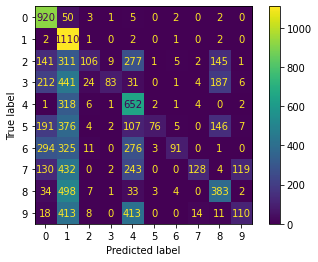

In [58]:
#Create graph of PCA applied Naive bayes confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)

disp.plot()

plt.show()

In [59]:
#Training PCA applied KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='brute')
t0 = time.time()
knc.fit(X_train, Y_train)
t1 = time.time()
pred_train = knc.predict(X_train[0:10000])
t2 = time.time()

print(f'Training time: {t1-t0:3.3f}')
print(f'Prediction time for train: {t2-t1:3.3f}')
print(f'Youdens index for train: {((metrics.balanced_accuracy_score(Y_train[0:10000], pred_train)*2)-1):.3f}')

Training time: 0.086
Prediction time for train: 15.492
Youdens index for train: 0.929


In [60]:
t3 = time.time()
pred_val = knc.predict(X_val)
t4 = time.time()
print(f'Prediction time for validation: {t4-t3:3.3f}')
print(f'Youdens index for validation: {((metrics.balanced_accuracy_score(Y_val, pred_val)*2)-1):.3f}')

Prediction time for validation: 15.601
Youdens index for validation: 0.898


In [61]:
t5 = time.time()
pred_test = knc.predict(X_test)
t6 = time.time()
print(f'Prediction time for test: {t6-t5:3.3f}')
print(f'Youdens index for test: {((metrics.balanced_accuracy_score(Y_test, pred_test)*2)-1):.3f}')

Prediction time for test: 12.831
Youdens index for test: 0.898


In [62]:
#PCA applied KNeighborsClassifier confusion matrix

cm = confusion_matrix(Y_test, pred_test)
cm

array([[ 968,    0,    0,    0,    2,    5,    6,    0,    1,    1],
       [   0, 1108,    4,    0,    0,    0,    1,    2,    1,    2],
       [  12,    7,  946,   11,    3,    1,    7,    4,    6,    1],
       [   1,    2,    7,  934,    0,   16,    0,   14,    9,    6],
       [   1,   15,    8,    0,  923,    2,    2,    4,    1,   31],
       [   7,    3,    5,   22,    4,  847,   17,    3,    3,    3],
       [   3,    3,    2,    2,    4,    8,  978,    0,    1,    0],
       [   2,   10,    3,    4,    6,    2,    0,  998,    0,   33],
       [   7,   10,    6,   27,    7,   21,    5,    5,  871,    6],
       [   2,    1,    2,   10,   14,    2,    0,   31,    2,  923]])

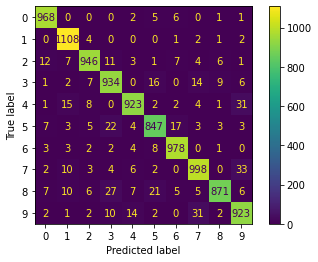

In [64]:
#Create graph of PCA applied KNeighborsClassifier confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knc.classes_)

disp.plot()

plt.show()

In [65]:
#Training PCA applied MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(75, 50), random_state=19)
t0 = time.time()
mlp.fit(X_train, Y_train)
t1 = time.time()
pred_train = mlp.predict(X_train[0:10000])
t2 = time.time()

print(f'Training time: {t1-t0:3.3f}')
print(f'Prediction time for train: {t2-t1:3.3f}')
print(f'Youdens index for train: {((metrics.balanced_accuracy_score(Y_train[0:10000], pred_train)*2)-1):.3f}')

Training time: 45.358
Prediction time for train: 0.052
Youdens index for train: 1.000


In [66]:
t3 = time.time()
pred_val = mlp.predict(X_val)
t4 = time.time()
print(f'Prediction time for validation: {t4-t3:3.3f}')
print(f'Youdens index for validation: {((metrics.balanced_accuracy_score(Y_val, pred_val)*2)-1):.3f}')

Prediction time for validation: 0.052
Youdens index for validation: 0.937


In [67]:
t5 = time.time()
pred_test = mlp.predict(X_test)
t6 = time.time()
print(f'Prediction time for test: {t6-t5:3.3f}')
print(f'Youdens index for test: {((metrics.balanced_accuracy_score(Y_test, pred_test)*2)-1):.3f}')

Prediction time for test: 0.044
Youdens index for test: 0.937


In [68]:
#PCA applied MLPClassifier confusion matrix

cm = confusion_matrix(Y_test, pred_test)
cm

array([[ 966,    0,    3,    1,    3,    2,    4,    1,    2,    1],
       [   0, 1099,    4,    2,    3,    2,    1,    1,    4,    2],
       [   4,    3,  965,    6,    3,    1,    3,    6,    5,    2],
       [   3,    0,    7,  947,    1,   13,    1,    7,    8,    2],
       [   0,    2,    1,    0,  962,    1,    1,    2,    5,   13],
       [   5,    1,    2,    9,    0,  882,    4,    2,    5,    4],
       [   6,    1,    5,    0,    7,    6,  973,    0,    3,    0],
       [   2,    0,    6,    2,    3,    2,    0, 1030,    1,   12],
       [   4,    3,    7,    5,    5,    6,    4,    4,  924,    3],
       [   2,    0,    0,    6,   13,    6,    1,   13,    6,  940]])

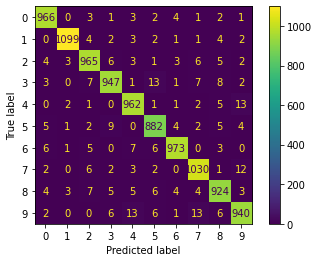

In [70]:
#Create graph of PCA applied MLPClassifier confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)

disp.plot()

plt.show()